<a href="https://colab.research.google.com/github/r42arty/hse/blob/main/mod3/MathStat/MS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание № 4
Состоит из двух частей: Z-тест и t-тест, проверка гипотез о сдвиге и однородности.

In [7]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind

import math

# Часть 1: Проверка гипотез (Z-тест и t-тест)

## Задача 1: Сравнение методов анализа данных

### Контекст
Компания провела эксперимент по улучшению времени загрузки страницы. Данные собраны для двух групп пользователей: контрольной (старая версия) и тестовой (новая версия). Вам нужно проанализировать данные, используя Z-тест и t-тест, и сравнить результаты.

### Данные
- **Контрольная группа**: 500 пользователей, среднее время загрузки $\bar{X}_A = 3.8$ сек, стандартное отклонение $\sigma_A = 0.9$ сек.
- **Тестовая группа**: 520 пользователей, среднее время загрузки $\bar{X}_B = 3.5$ сек, стандартное отклонение $\sigma_B = 1.0$ сек.

### Задания $(\Sigma 36 points)$
1. $(4 \times 3 points)$ **Проверьте гипотезу о равенстве средних с использованием Z-теста.** Укажите:
   - Формулировку нулевой и альтернативной гипотез.
   - Расчёт Z-статистики.
   - Критическое значение и p-value.
   - Вывод о значимости.

2. $(4 \times 3 points)$ **Проверьте гипотезу о равенстве средних с использованием t-теста Уэлча.** Укажите:
   - Формулировку нулевой и альтернативной гипотез.
   - Расчёт t-статистики и степеней свободы.
   - Критическое значение и p-value.
   - Вывод о значимости.

3. $(2 \times 3 points)$ **Сравните результаты Z-теста и t-теста.** Ответьте на вопросы:
   - Почему результаты могут отличаться?
   - Какой тест лучше подходит для этих данных?

4. $(2 \times 3 points)$ **Сделайте бизнес-рекомендацию на основе анализа.** Укажите:
   - Статистическую значимость изменений.
   - Практическую значимость (например, в секундах).

# Решение задачи 1: Сравнение методов анализа данных

### 1.1 Проверьте гипотезу о равенстве средних с использованием Z-теста.

### 1.1.1 Формулировку нулевой и альтернативной гипотез

$ H_0$: среднее время загрузки страницы в контрольной группе (старой версии) равно среднему времени загрузки в тестовой группе (новой версии)

$ H_1$: среднее время загрузки страницы в контрольной группе не равно среднему времени загрузки в тестовой группе (новой версии)

### 1.1.2 Расчёт Z-статистики

In [14]:
# Данные
mean_A = 3.8
mean_B = 3.5
sigma_A = 0.9
sigma_B = 1.0
n_A = 500
n_B = 520

In [15]:
# Расчет Z-статистики
z = (mean_A - mean_B) / math.sqrt((sigma_A**2 / n_A) + (sigma_B**2 / n_B))
z

5.040004962468865

### 1.1.3 Критическое значение и p-value

In [16]:
from scipy.stats import norm

alpha = 0.05                        # Уровень значимости
z_critical = norm.ppf(1 - alpha/2)  # Критическое значение для двухстороннего теста

# p-value (двухсторонний)
p_value = 2 * (1 - norm.cdf(abs(z)))

z_critical, p_value

(np.float64(1.959963984540054), np.float64(4.6551977495035146e-07))

### 1.1.4 Вывод о значимости

In [17]:
if abs(z) > z_critical:
    print(f"Статистика Z = {z:.3f} превышает критическое значение {z_critical:.3f}.")
    print("Отклоняем нулевую гипотезу (H0). Изменения статистически значимы.")
else:
    print(f"Статистика Z = {z:.3f} не превышает критическое значение {z_critical:.3f}.")
    print("Нет оснований отклонить нулевую гипотезу (H0). Изменения статистически незначимы.")
print(f"p-value = {p_value:.10f}")

Статистика Z = 5.040 превышает критическое значение 1.960.
Отклоняем нулевую гипотезу (H0). Изменения статистически значимы.
p-value = 0.0000004655


### 1.2 Проверьте гипотезу о равенстве средних с использованием t-теста Уэлча

### 1.2.1 Формулировку нулевой и альтернативной гипотез

$H_0$: среднее время загрузки в контрольной группе равно среднему времени загрузки в тестовой группе

$H_1$: среднее время загрузки в контрольной группе не равно среднему времени загрузки в тестовой группе

### 1.2.2 Расчёт t-статистики и степеней свободы

In [19]:
# Расчет t-статистики по формуле Уэлча
t_stat = (mean_A - mean_B) / math.sqrt((sigma_A**2 / n_A) + (sigma_B**2 / n_B))

# Расчет степеней свободы (формула Уэлча)
numerator = (sigma_A**2 / n_A + sigma_B**2 / n_B)**2
denominator = ((sigma_A**2 / n_A)**2 / (n_A - 1)) + ((sigma_B**2 / n_B)**2 / (n_B - 1))
df = numerator / denominator

t_stat, df

(5.040004962468865, 1013.5972107955116)

### 1.2.3 Критическое значение и p-value

Критическое значение (±): 1.9623
P-value: 0.0000096794


### 1.2.4 Вывод о значимости.

Отвергаем H₀: различия статистически значимы


### 1.3 Сравните результаты Z-теста и t-теста

### 1.3.1 Почему результаты могут отличаться?
### 1.3.2 Какой тест лучше для этих данных?

### 1.4 Сделайте бизнес-рекомендацию на основе анализа

### 1.4.1 Статистическую значимость изменений
### 1.4.2 Практическая значимость (например, в секундах)

# Часть 2: Проверка гипотез о сдвиге и однородности

## Задача 1: Сравнение методов анализа сдвига

### Контекст
Компания провела A/B-тест двух версий лендинга. Вам предоставлены данные о времени (в секундах), проведенном на странице:
- Группа A (старая версия): 150 пользователей  
- Группа B (новая версия): 160 пользователей  

**Цель**: Определить, увеличилось ли среднее время на странице в группе B.

In [ ]:
import numpy as np
np.random.seed(42)

# Генерация данных с асимметрией и выбросами
def generate_skewed(loc, scale, skew, size):
    data = np.random.weibull(skew, size) * scale + loc
    return np.clip(data, 0, None)

group_a = generate_skewed(120, 40, 1.5, 150)
group_b = generate_skewed(135, 50, 0.8, 160)

### Задания  $(\Sigma 35 points)$
1. $(3 \times 3 points)$ **Разведочный анализ:**
   - Постройте гистограммы и boxplot для обеих групп
   - Рассчитайте медиану, среднее, стандартное отклонение
   - Проверьте наличие выбросов (правило 3σ или IQR \[межквартильный размах = разница между 75-процентилем и 25-процентилем\])

2. $(3 \times 3 points)$ **Проверка условий:**
   - Тест Шапиро-Уилка на нормальность
   - Тест Левена на равенство дисперсий
   - Обоснуйте выбор параметрических/непараметрических методов

3. $(3 \times 3 points)$ **Применение критериев:**
   - Проведите:
       - (а) Парный t-тест (если данные нормальны)
       - (б) Тест Уэлча (Welch's t-test) (при неравных дисперсиях)
       - (в) U-тест Манна-Уитни
   
4. $(2 \times 4 points)$ **Сравнение результатов:**
   - Объясните расхождения между параметрическими и непараметрическими методами
   - Сформулируйте итоговый вывод для product-менеджера

## Задача 1: Сравнение методов анализа сдвига

### 1.1 Разведочный анализ

### 1.1.1 Постройте гистограммы и boxplot для обеих групп

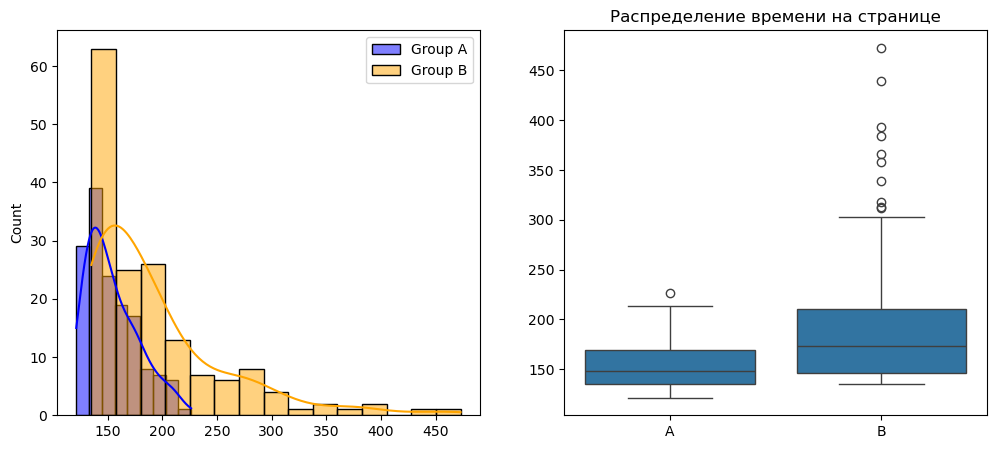

### 1.1.2 Рассчитайте медиану, среднее, стандартное отклонение

### 1.1.3 Проверьте наличие выбросов (правило 3σ или IQR \[межквартильный размах = разница между 75-процентилем и 25-процентилем\])

### 1.2 Проверка условий

### 1.2.1 Тест Шапиро-Уилка на нормальность

Group A: p-value = 0.0000, отклонение от нормальности
Group B: p-value = 0.0000, отклонение от нормальности


### 1.2.2 Тест Левена на равенство дисперсий


Тест Левена: p-value = 0.0000, разные дисперсии


### 1.2.3 Обоснуйте выбор параметрических/непараметрических методов

### 1.3 Применение критериев

### 1.3.1 Парный t-тест (если данные нормальны)

Student's t-test: t=-7.00, p=0.0000


### 1.3.2 Welch's t-test (при неравных дисперсиях)

Welch's t-test: t=-7.18, p=0.0000


### 1.3.3 U-тест Манна-Уитни

Mann-Whitney U-test: U = 6842, p-value = 0.0000


### 1.4 Сравнение результатов

### 1.4.1 Объясните расхождения между параметрическими и непараметрическими методами

### 1.4.2 Сформулируйте итоговый вывод для product-менеджера

## Задача 2: Анализ вариативности в маркетинговых данных
### Контекст
Анализируется стабильность CTR двух рекламных кампаний:
- Кампания X: 200 дней наблюдений  
- Кампания Y: 200 дней наблюдений

**Цель**: Проверить гипотезу, что кампания Y имеет меньшую вариативность CTR.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import DBSCAN

campaign_x = np.concatenate([
    np.random.normal(0.05, 0.01, 150),
    np.random.normal(0.08, 0.02, 50)
])
campaign_y = np.random.beta(a=2, b=40, size=200) * 0.1

### Задания $(\Sigma 29 points)$
1. $(3 \times 3 points)$ **Первичный анализ:**
   - Рассчитайте [коэффициент вариации](https://ru.wikipedia.org/wiki/Коэффициент_вариации) для обеих кампаний
   - Постройте Q-Q plot относительно бета-распределения и выполните тест [Шапиро-Уилка](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) (проверка нормальности)
   - Выявите кластеры в данных (например, [методом](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) [DBSCAN](https://ru.wikipedia.org/wiki/DBSCAN))

2. $(11 points)$ **Проверка гипотез:**
   -  $(4 points)$ F-тест для нормализованных данных
   -  $(4 points)$ Тест Левена с медианной центровкой
   -  $(3 points)$ Bootstrap-оценка 95% ДИ для отношения дисперсий
   
4. $(3 \times 3 points)$ **Интерпретация:**
   - Свяжите статистические выводы с бизнес-метриками:
       - (а) Сделайте статистические выводы (статистическая значимость вариативности, ДИ, кол-во кластеров)  
       - (б) Риск бюджетных потерь при нестабильности CTR
       - (в) Оптимальный размер выборки для будущих тестов

## Задача 2: Анализ стабильности CTR

### Генерация данных

In [ ]:
# Создаем DataFrame
ctr_df = pd.DataFrame({
    'CTR': np.concatenate([campaign_x, campaign_y]),
    'Campaign': ['X']*200 + ['Y']*200
})

### 2.1 Первичный анализ

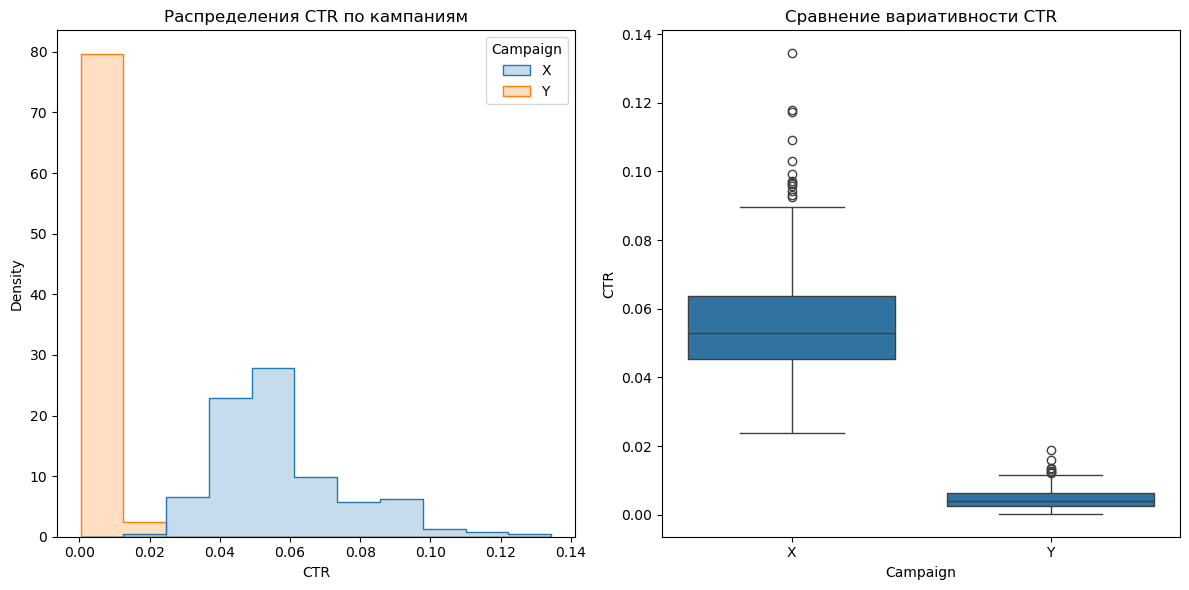

In [ ]:
plt.figure(figsize=(12, 6))

# Гистограммы с ядерной оценкой плотности
plt.subplot(121)
sns.histplot(data=ctr_df, x='CTR', hue='Campaign',
             element='step', stat='density', common_norm=False)
plt.title('Распределения CTR по кампаниям')

# Боксплоты
plt.subplot(122)
sns.boxplot(data=ctr_df, x='Campaign', y='CTR')
plt.title('Сравнение вариативности CTR')
plt.tight_layout()
plt.show()

### 2.1.1 Рассчитайте [коэффициент вариации](https://ru.wikipedia.org/wiki/Коэффициент_вариации) для обеих кампаний

Campaign X: CV = 0.3230
Campaign Y: CV = 0.6670


### 2.1.2 Постройте Q-Q plot относительно бета-распределения и выполните [Шапиро-Уилка](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) (проверка нормальности)

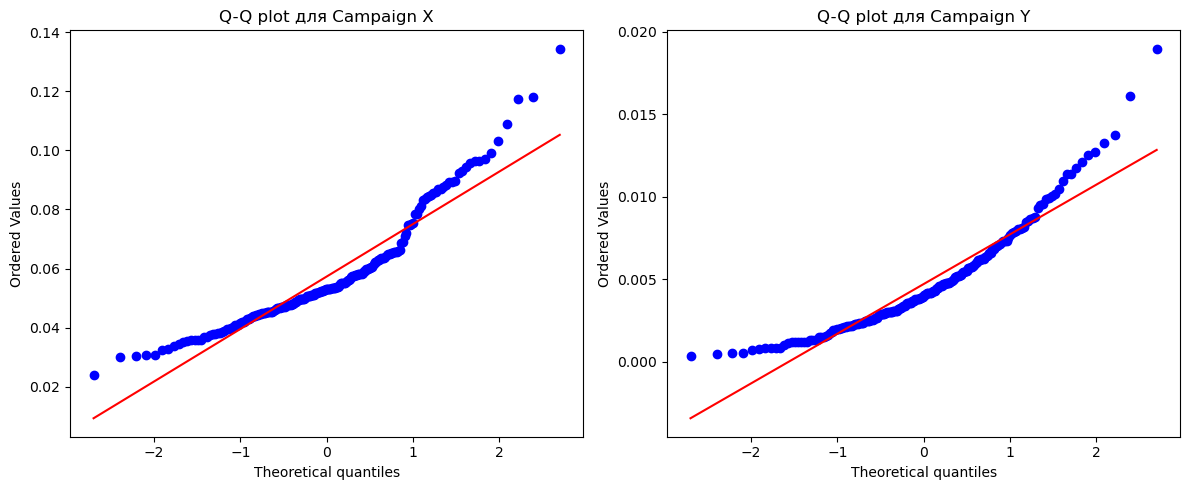

Результаты тестов нормальности:
Campaign X: Shapiro p-value = 0.0000
Campaign Y: Shapiro p-value = 0.0000


### 2.1.3 Выявите кластеры в данных [методом](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) [DBSCAN](https://ru.wikipedia.org/wiki/DBSCAN)

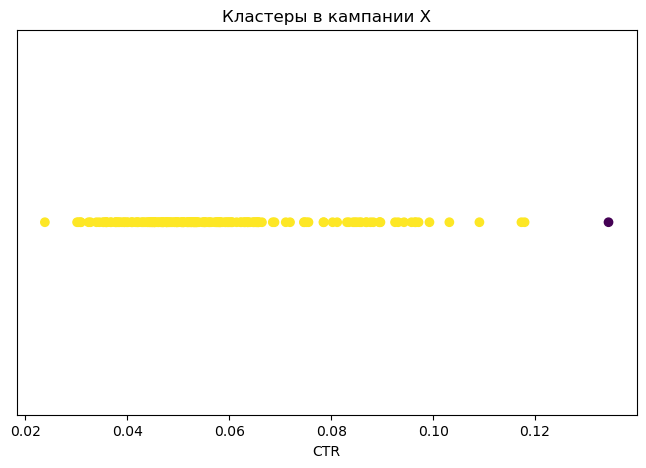

Обнаружено кластеров в Campaign X: 1


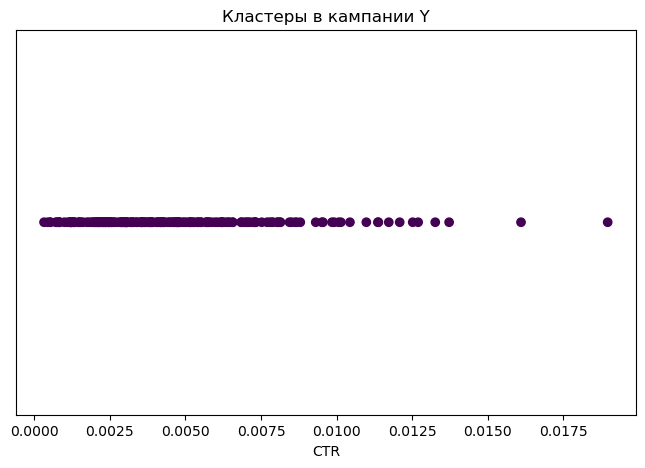

Обнаружено кластеров в Campaign Y: 0


### 2.2 Статистический анализ вариативности

### 2.2.1 F-тест для нормализованных данных

F-тест: F = 34.81, p-value = 0.0000


### 2.2.2 Тест Левена с медианной центровкой


Тест Левена: W = 123.18, p-value = 0.0000


### 2.2.3 Bootstrap-оценка 95% ДИ для отношения дисперсий


95% ДИ отношения дисперсий (Y/X): [0.02, 0.04]


### 2.3 Интерпретация